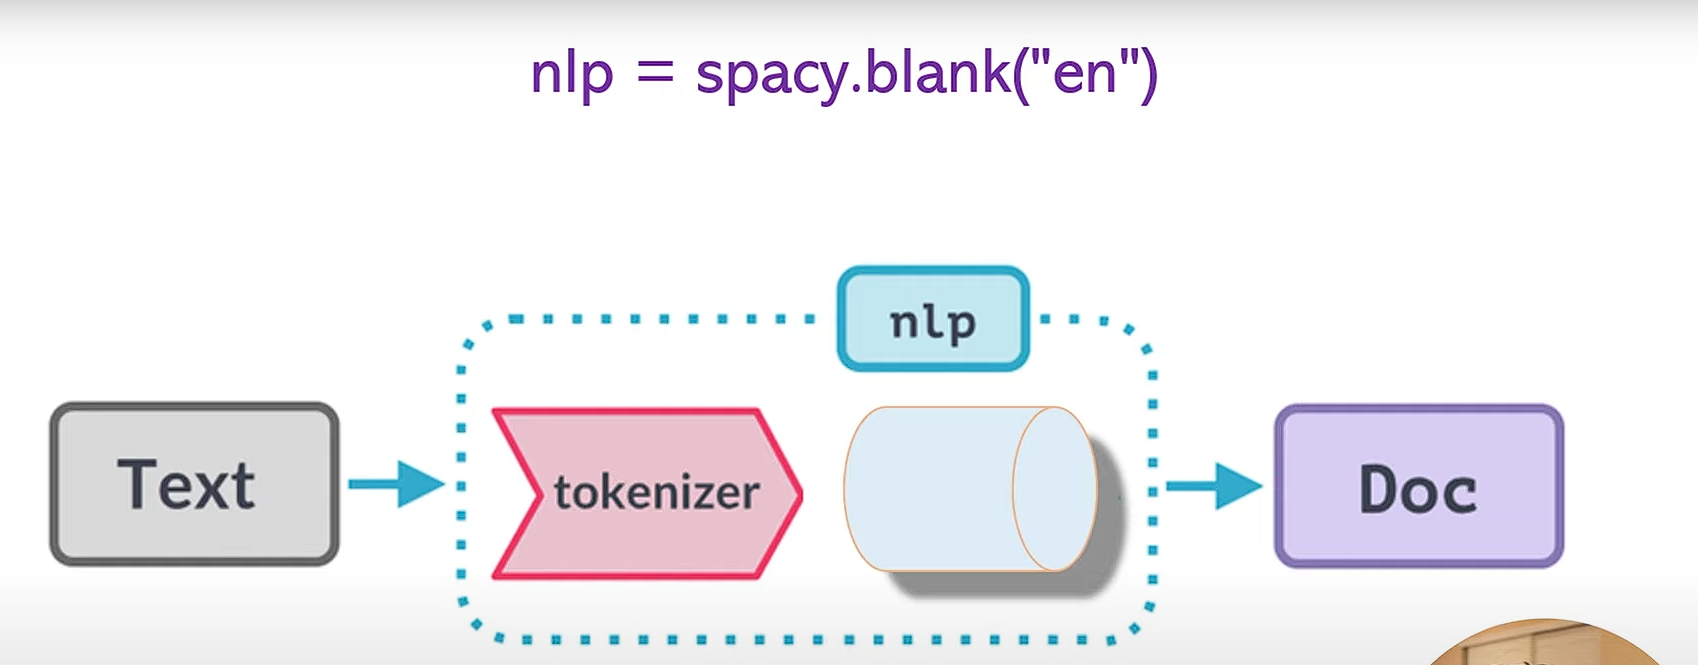

In [44]:
import spacy

In [45]:
nlp = spacy.blank("en")

doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


In [46]:
nlp.pipe_names #it is empty becz of blank pipeline we created above.

[]

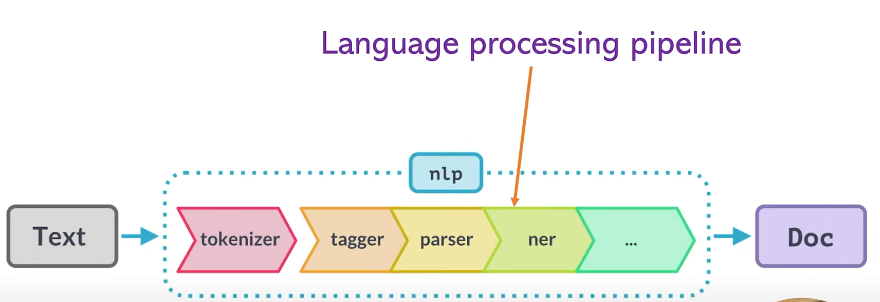

en_core_web_sm

en -> english
sm -> small

In [47]:
nlp = spacy.load("en_core_web_sm")

In [48]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [49]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

# Print headers
print(f"{'Token'.ljust(15)} | {'POS'.ljust(10)} | {'Lemma'}")
print("-" * (40)) 

# Print each token, POS, and lemma
for token in doc:
    print(f"{token.text.ljust(15)} | {token.pos_.ljust(10)} | {token.lemma_}")


Token           | POS        | Lemma
----------------------------------------
Captain         | PROPN      | Captain
america         | PROPN      | america
ate             | VERB       | eat
100             | NUM        | 100
$               | NUM        | $
of              | ADP        | of
samosa          | PROPN      | samosa
.               | PUNCT      | .
Then            | ADV        | then
he              | PRON       | he
said            | VERB       | say
I               | PRON       | I
can             | AUX        | can
do              | VERB       | do
this            | PRON       | this
all             | DET        | all
day             | NOUN       | day
.               | PUNCT      | .


In [50]:
doc1 = nlp("Tesla Inc is going to acquire twitter for $44 billion")

#ents : entity recognition of names(NER)
for ent in doc1.ents:
    print(f"{ent.text.ljust(12)} | {ent.label_.ljust(5)} | {spacy.explain(ent.label_)} ")

Tesla Inc    | ORG   | Companies, agencies, institutions, etc. 
$44 billion  | MONEY | Monetary values, including unit 


**Display data**

In [51]:
from spacy import displacy

displacy.render(doc1, style = "ent")

**Adding NER Component to Blank pipeline**

In [52]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']

In [55]:
doc2 = nlp("Tesla Inc is going to acquire twitter for $44 billion")

for ent in doc2.ents:
    print(ent.text.ljust(12), " | ", ent.label_.ljust(10), " | ", spacy.explain(ent.label_).ljust(10))

Tesla Inc     |  ORG         |  Companies, agencies, institutions, etc.
$44 billion   |  MONEY       |  Monetary values, including unit
